In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model, svm, tree, neighbors, neural_network, ensemble
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.grid_search import GridSearchCV
from time import time
import xgboost as xgb
import seaborn as sns

C:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
os.chdir('D:/LocalData/N196003/Desktop/UNS/2017 US UNS SPSS-sav')

In [3]:
df_uns = pd.read_csv('US_UNS_Dummy.csv')
q_selected = pd.read_csv('Selected_Q_TF.csv')

In [21]:
"""RFE法で絞り込んだ30問を読み出し"""
q_selected = q_selected.drop('Unnamed: 0', axis = 1)
q_list = list(q_selected[q_selected['Selected or Not'] == True]['Question'])
df_learn = df_uns.loc[:, q_list + ['NeedsGroup']]

In [23]:
X_train = df_learn.drop('NeedsGroup', axis = 1)
y_train = df_learn.NeedsGroup

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)

In [45]:
train_sizes, train_scores, test_scores = learning_curve(estimator=xgb.XGBClassifier(reg_alpha=0, reg_lambda=0.5), X=x_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5, n_jobs=-1, verbose=3)

[learning_curve] Training set sizes: [ 1606  3212  4818  6425  8031  9637 11244 12850 14456 16063]


[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:  1.7min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  34 out of  50 | elapsed:  3.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.0min finished


In [46]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [47]:
train_mean

array([0.89701121, 0.8362391 , 0.79759236, 0.77382101, 0.75544764,
       0.74616582, 0.7403593 , 0.73483268, 0.73151633, 0.7284567 ])

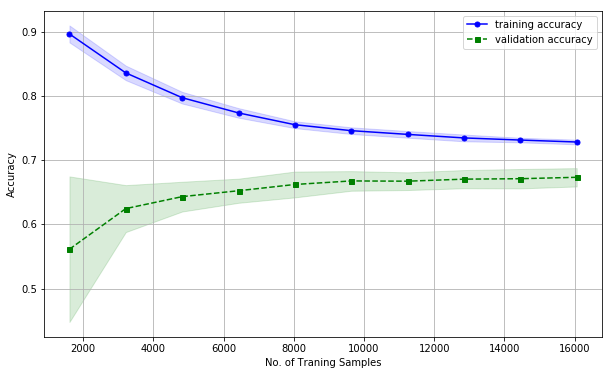

In [48]:
plt.clf()
fig = plt.figure(figsize=(10,6), facecolor='w')
plt.plot(train_sizes, train_mean, color = 'blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, color = 'green', marker='s', linestyle='--', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('No. of Traning Samples')
plt.ylabel('Accuracy')
plt.legend(loc ='best')

plt.show()

学習曲線が70%に収束してしまっている<br>
L1, L2正則化項がともにゼロ<br>
この特徴量では学習不足<br>